## Tech Stocks

### 1. Importing Packages and data

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

symbols = ["MSFT", "AMZN", "AAPL", "GOOG", "FB", "NFLX"]
start_date = "2021-01-01"
end_date = "2021-12-31"
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

### 2. Data Info

In [146]:
stock_data.head()

Attributes   Adj Close                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2021-01-04  215.880432  3186.629883  128.617111  1728.239990  268.940002   
2021-01-05  216.088669  3218.510010  130.207275  1740.920044  270.970001   
2021-01-06  210.485626  3138.379883  125.824326  1735.290039  263.309998   
2021-01-07  216.475433  3162.159912  130.117844  1787.250000  268.739990   
2021-01-08  217.794373  3182.699951  131.240921  1807.209961  267.570007   

Attributes                   Close                                        ...  \
Symbols           NFLX        MSFT         AMZN        AAPL         GOOG  ...   
Date                                                                      ...   
2021-01-04  522.859985  217.690002  3186.629883  129.410004  1728.239990  ...   
2021-01-05  520.799988  217.899994  3218.510010  131.009995  1740.920044  ...   
2021-01-06  500.489990  212.250000  3138.379883  126.599998  1735.290039  ...   
2021-01-07  508.890015  218.289993  3162.159912  130.919998  1787.250000  ...   
2021-01-08  510.399994  219.619995  3182.699951  132.050003  1807.209961  ...   

Attributes        Open                                           Volume  \
Symbols           AAPL         GOOG          FB        NFLX        MSFT   
Date                                                                      
2021-01-04  133.520004  1757.540039  274.779999  539.000000  37130100.0   
2021-01-05  128.889999  1725.000000  268.290009  521.549988  23823000.0   
2021-01-06  127.720001  1702.630005  262.000000  511.970001  35930700.0   
2021-01-07  128.360001  1740.060059  265.899994  508.279999  27694500.0   
2021-01-08  132.429993  1787.979980  268.309998  511.309998  22956200.0   

Attributes                                                            
Symbols          AMZN         AAPL       GOOG          FB       NFLX  
Date                                                                  
2021-01-04  4411400.0  143301900.0  1901900.0  15106100.0  4444400.0  
2021-01-05  2655500.0   97664900.0  1145300.0   9871600.0  3133900.0  
2021-01-06  4394800.0  155088000.0  2602100.0  24354100.0  5346200.0  
2021-01-07  3514500.0  109578200.0  2265000.0  15789800.0  3686400.0  
2021-01-08  3537700.0  105158200.0  2050600.0  18528300.0  2973900.0  

[5 rows x 36 columns]

In [147]:
stock_data= stock_data['Adj Close']

### 3. Adjusted closing prices over time.

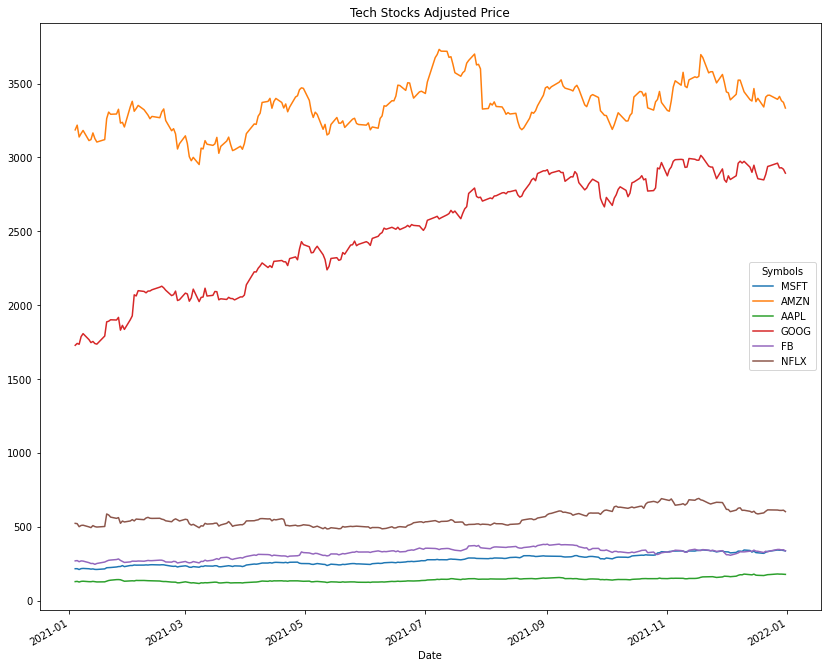

In [148]:
stock_data.plot(figsize=(14, 12))
plt.x_label= "Date"
plt.y_label= "Adjusted Closing Price Over Time"
plt.title("Tech Stocks Adjusted Price")
plt.savefig('Tech Stocks Adjusted Price.png')
plt.show()

### 4. Daily simple rate of return over time.

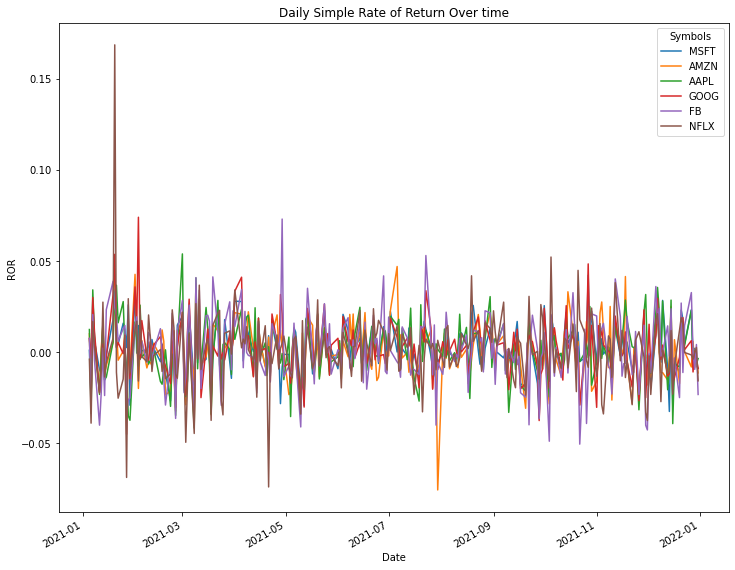

In [149]:
stock_data_daily_returns = stock_data.pct_change()
stock_data_daily_returns.plot(figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.savefig('Daily Simple Rate of Return Over time.png')
plt.show()

### 5. Visualizing daily simple rate of return.

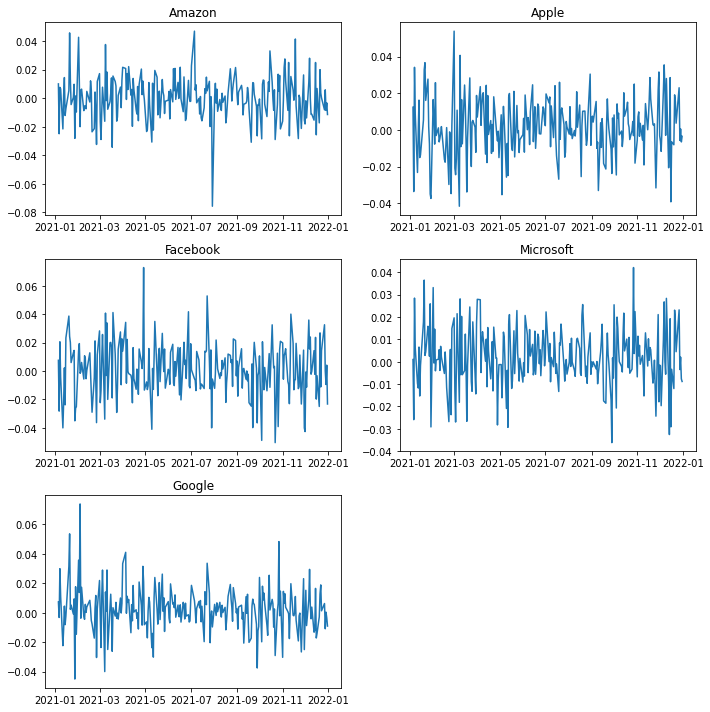

In [91]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['FB'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['GOOG'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.savefig('Daily simple rate of return for individual stock.png')
plt.show()

### 6. The mean of each tech stock's daily simple rate of return

In [94]:
daily_mean= stock_data_daily_returns.mean().sort_values()
daily_mean

Symbols
AMZN    0.000295
NFLX    0.000762
FB      0.001064
AAPL    0.001409
MSFT    0.001855
GOOG    0.002166
dtype: float64

In [95]:
# daily mean index for the x axis
daily_mean.keys()

Index(['AMZN', 'NFLX', 'FB', 'AAPL', 'MSFT', 'GOOG'], dtype='object', name='Symbols')

In [96]:
# grabs each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.0002951499213141052,
 0.000761511040819202,
 0.0010642527096604967,
 0.0014094183843972616,
 0.0018545706337338983,
 0.0021658764485135403]

In [97]:
# arranges keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4, 5])

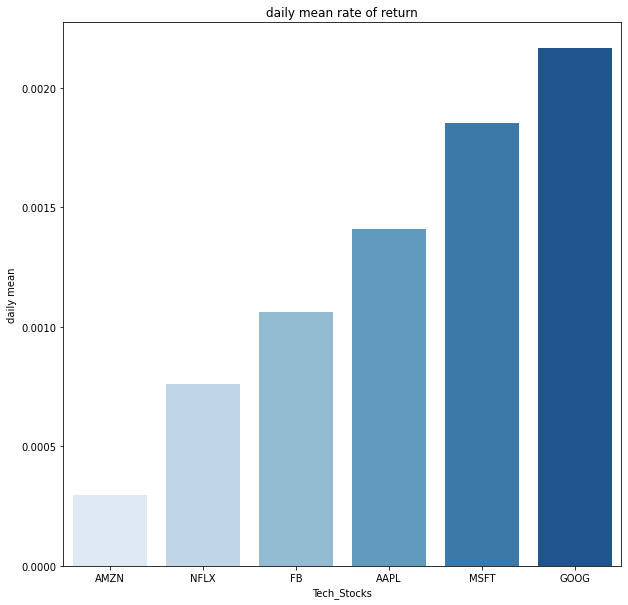

In [129]:
# plot bars
plt.figure(figsize=(10, 10))
sns.barplot(x=x_pos, y=height, palette= "Blues")
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.savefig('daily mean rate of return.png')
plt.show()

Google has the highest mean simple rate of return over the period of data collected. Thus Google would have been a good choice for investment over this period of time. Amazon, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Variance.

In [17]:
daily_variance= stock_data_daily_returns.var()
daily_variance

Symbols
MSFT    0.000174
AMZN    0.000229
AAPL    0.000248
GOOG    0.000223
FB      0.000347
NFLX    0.000404
dtype: float64

In [18]:
# daily variance index for the x axis
daily_variance.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB', 'NFLX'], dtype='object', name='Symbols')

In [19]:
# grabs each daily variance value for the y axis
height = []
for key in daily_variance.keys():
    height.append(daily_variance[key])
height

[0.00017438626692638522,
 0.00022935836195386698,
 0.00024832273273390213,
 0.00022302145606370325,
 0.0003471800329409397,
 0.0004043093491772574]

In [20]:
# arranges keys on x axis based on length
x_pos = np.arange(len(daily_variance.keys()))
x_pos

array([0, 1, 2, 3, 4, 5])

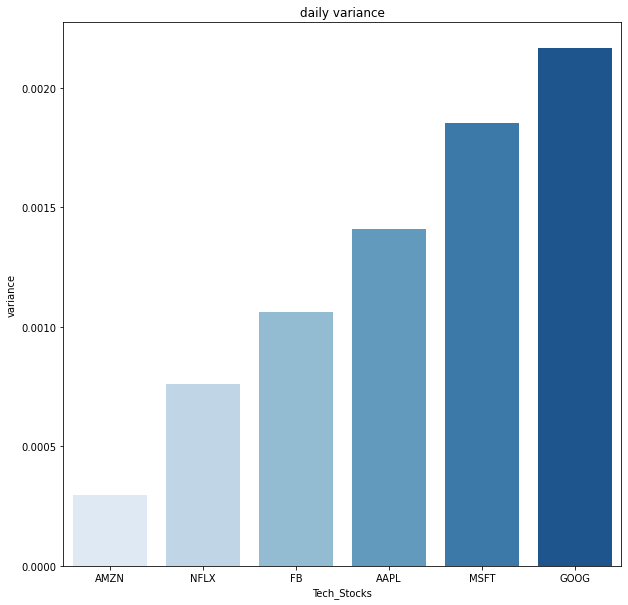

In [130]:
# plot bars
plt.figure(figsize=(10, 10))
sns.barplot(x= x_pos, y= height, palette= "Blues")
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.savefig('daily variance.png')
plt.show()

Google shows the highest variance of all the stocks, indicating it can be a riskier investment. Amazon shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

In [22]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

Symbols
MSFT    0.013206
AMZN    0.015145
AAPL    0.015758
GOOG    0.014934
FB      0.018633
NFLX    0.020107
dtype: float64

In [23]:
# standard deviation index for the x axis
daily_variance.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB', 'NFLX'], dtype='object', name='Symbols')

In [24]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.013205539251631688,
 0.01514458193394149,
 0.01575825919110046,
 0.01493390290793747,
 0.018632767720898034,
 0.020107445118096368]

In [25]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4, 5])

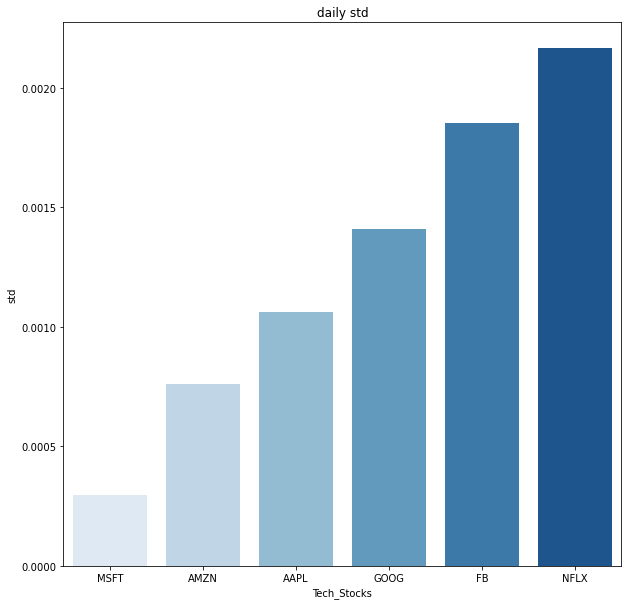

In [131]:
# plot bars
plt.figure(figsize=(10, 10))
sns.barplot(x=x_pos, y=height, palette= "Blues")
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.savefig('daily std.png')
plt.show()

### 9. The correlations

In [27]:
cov_matrix= stock_data_daily_returns.cov()
cov_matrix

Symbols,MSFT,AMZN,AAPL,GOOG,FB,NFLX
Symbols,,,,,,
MSFT,0.000174,0.000115,0.000141,0.000141,0.000126,0.000125
AMZN,0.000115,0.000229,0.000141,0.000133,0.000144,0.000137
AAPL,0.000141,0.000141,0.000248,0.000128,0.000148,0.000127
GOOG,0.000141,0.000133,0.000128,0.000223,0.000158,0.000136
FB,0.000126,0.000144,0.000148,0.000158,0.000347,0.000154
NFLX,0.000125,0.000137,0.000127,0.000136,0.000154,0.000404


None of the stocks are negatively correlated. Apple and Google are highly correlated, while Microsoft and Amazon exhibit the lowest correlation.

In [28]:
expected_returns= daily_mean
expected_returns

Symbols
MSFT    0.001855
AMZN    0.000295
AAPL    0.001409
GOOG    0.002166
FB      0.001064
NFLX    0.000762
dtype: float64

In [57]:
import random
import cvxopt as opt
from cvxopt import blas, solvers

def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks


In [58]:
selected=list(stock_data.columns[1:])

returns_new = stock_data[selected].pct_change()

random_portfolios = return_portfolios(expected_returns, cov_matrix)
weights, returns, risks = optimal_portfolio(returns_new[1:])

     pcost       dcost       gap    pres   dres
 0: -1.1327e-03 -1.0022e+00  1e+00  0e+00  3e+00
 1: -1.1335e-03 -1.2159e-02  1e-02  9e-17  3e-02
 2: -1.2013e-03 -2.2585e-03  1e-03  1e-16  3e-03
 3: -2.0392e-03 -2.6272e-03  6e-04  2e-17  9e-04
 4: -2.1459e-03 -2.1595e-03  1e-05  2e-16  2e-05
 5: -2.1546e-03 -2.1548e-03  1e-07  1e-16  2e-07
 6: -2.1547e-03 -2.1547e-03  1e-09  6e-21  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1317e-03 -1.0022e+00  1e+00  0e+00  3e+00
 1: -1.1325e-03 -1.2158e-02  1e-02  4e-17  3e-02
 2: -1.2003e-03 -2.2576e-03  1e-03  9e-17  3e-03
 3: -2.0383e-03 -2.6260e-03  6e-04  7e-16  9e-04
 4: -2.1446e-03 -2.1581e-03  1e-05  2e-16  2e-05
 5: -2.1533e-03 -2.1534e-03  1e-07  1e-19  2e-07
 6: -2.1534e-03 -2.1534e-03  1e-09  6e-21  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1305e-03 -1.0022e+00  1e+00  2e-16  3e+00
 1: -1.1313e-03 -1.2157e-02  1e-02  2e-16  3e-02
 2: -1.1991e-03 -2.2565e

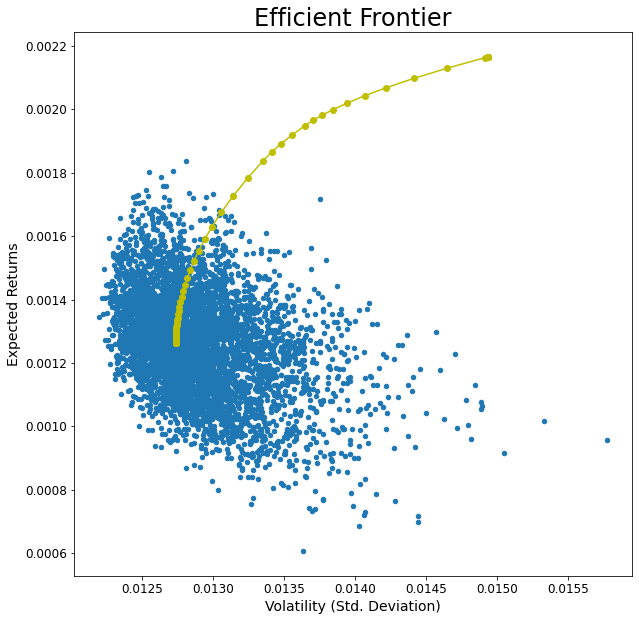

In [134]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(10, 10))
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.savefig('Efficient Frontier.png')
plt.show()

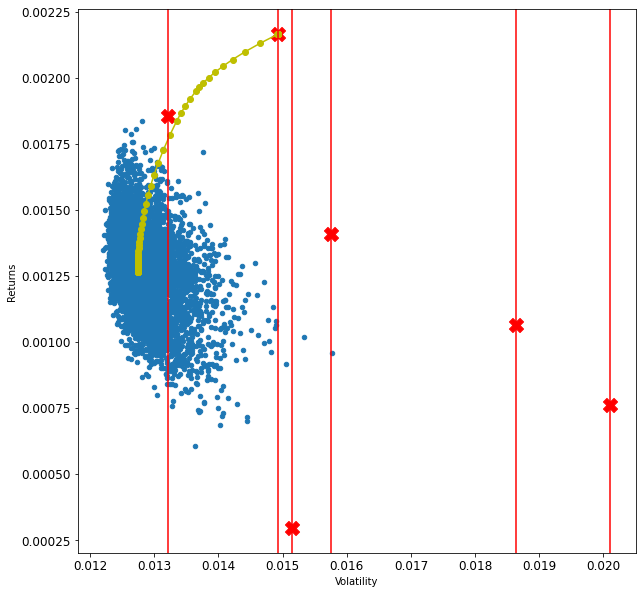

In [135]:
single_asset_std=np.sqrt(np.diagonal(cov_matrix))
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12, figsize=(10, 10))
plt.plot(risks, returns, 'y-o')
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
for xc in single_asset_std:
    plt.axvline(x=xc, color='red')
plt.savefig('Efficient Frontier2.png')
plt.show()

# Predicting 2022

### 10. predecting mean of each tech stock's daily simple rate of return

In [67]:
from sklearn import linear_model

In [78]:
stock_data['Adj Close'].head()

Symbols,MSFT,AMZN,AAPL,GOOG,FB,NFLX
Date,,,,,,
2021-01-04,215.880432,3186.629883,128.617126,1728.239990,268.940002,522.859985
2021-01-05,216.088669,3218.510010,130.207291,1740.920044,270.970001,520.799988
2021-01-06,210.485641,3138.379883,125.824326,1735.290039,263.309998,500.489990
2021-01-07,216.475418,3162.159912,130.117859,1787.250000,268.739990,508.890015
2021-01-08,217.794373,3182.699951,131.240936,1807.209961,267.570007,510.399994


In [90]:
new_stock_data= stock_data['Adj Close']

In [99]:
new_stock_data.head()

Symbols,MSFT,AMZN,AAPL,GOOG,FB,NFLX
Date,,,,,,
2021-01-04,215.880432,3186.629883,128.617126,1728.239990,268.940002,522.859985
2021-01-05,216.088669,3218.510010,130.207291,1740.920044,270.970001,520.799988
2021-01-06,210.485641,3138.379883,125.824326,1735.290039,263.309998,500.489990
2021-01-07,216.475418,3162.159912,130.117859,1787.250000,268.739990,508.890015
2021-01-08,217.794373,3182.699951,131.240936,1807.209961,267.570007,510.399994


In [100]:
new_stock_data.to_csv('stock_data.csv')

In [138]:
new_df= pd.read_csv("/Users/vishalsanjeevuni/Downloads/stock_data.csv")
new_df.head()

,Date,MSFT,AMZN,AAPL,GOOG,FB,NFLX
0,2021-01-04,215.880432,3186.629883,128.617126,1728.239990,268.940002,522.859985
1,2021-01-05,216.088669,3218.510010,130.207291,1740.920044,270.970001,520.799988
2,2021-01-06,210.485641,3138.379883,125.824326,1735.290039,263.309998,500.489990
3,2021-01-07,216.475418,3162.159912,130.117859,1787.250000,268.739990,508.890015
4,2021-01-08,217.794373,3182.699951,131.240936,1807.209961,267.570007,510.399994


In [176]:
MSFT= new_df.drop(['AMZN', 'AAPL', 'GOOG', 'FB', 'NFLX'], axis=1)
MSFT['Date'] = MSFT['Date'].str.split('-')
MSFT['Date'] = MSFT['Date'].str.get(1)

In [177]:
MSFT
MSFT_monthly= MSFT.groupby('Date').MSFT.mean().reset_index()
MSFT_monthly

,Date,MSFT
0,01,220.130064
1,02,238.298780
2,03,232.265618
3,04,254.039209
4,05,246.132162
5,06,258.051154
6,07,280.451413
7,08,293.475840
8,09,296.332142
9,10,302.988065


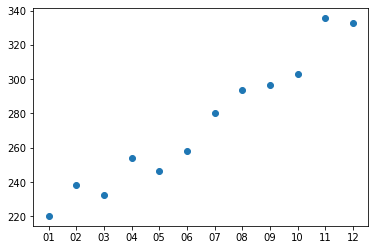

In [216]:
plt.scatter(data= MSFT_monthly, x="Date", y="MSFT")
plt.title("")
plt.show()

In [218]:
X= MSFT_monthly['Date']
X= X.values.reshape(-1, 1)
y= MSFT_monthly['MSFT']
regr= linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_[0])
print(regr.intercept_)

10.438505915385862
206.3575254934433


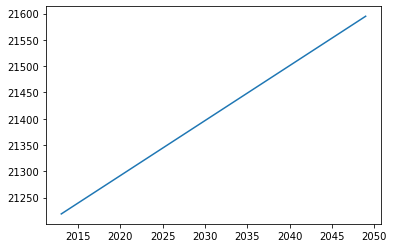

In [220]:
X_future= np.array(range(2013, 2050))
X_future= X_future.reshape(-1, 1)
future_predict= regr.predict(X_future)
plt.plot(X_future, future_predict)
plt.show()